In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

using TestImages
using ImageFiltering
using OffsetArrays
using JLD2
using Plots
using ImageView

  Activating project at `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/Manifest.toml:0


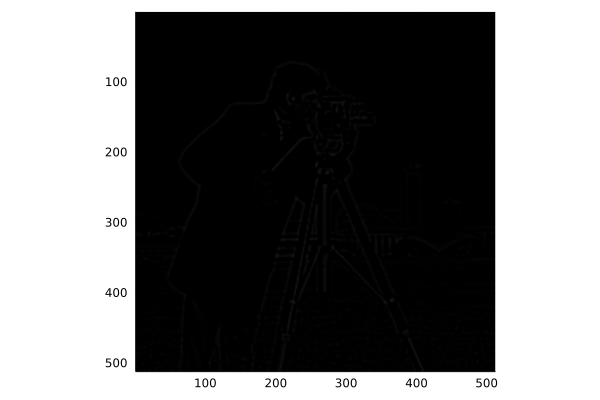

In [2]:
function filter_image(img, kernel)
    img_filtered = imfilter(img, kernel)
    return max.(img_filtered, 0), max.(-img_filtered, 0)
end

# Exercise 1.1
img = testimage("cameraman")

img₊, img₋ = filter_image(img, Kernel.LoG(2))

plot(Gray.(img))
plot(Gray.(img₊))
plot(Gray.(img₋))

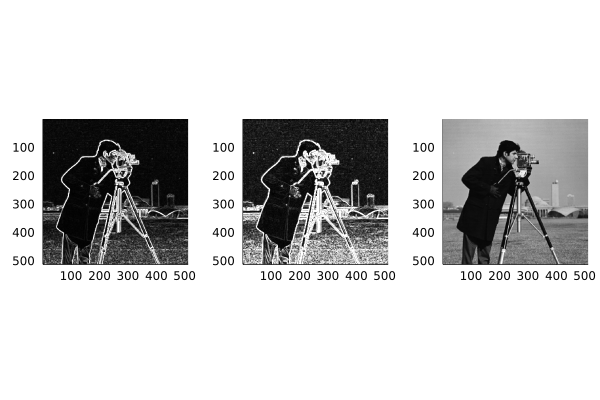

In [3]:
# Exercise 1.2
k_1 = OffsetArrays.centered([1 2 1; 0 0 0; -1 -2 -1]) # |
k_2 = OffsetArrays.centered([0 1 2; -1 0 1; -2 -1 0]) # /
k_3 = OffsetArrays.centered([1 0 -1; 2 0 -2; 1 0 -1]) # -
k_4 = OffsetArrays.centered([2 1 0; 1 0 -1; 0 -1 -2]) # \

img_1_pos, img_1_neg = filter_image(img, k_1)
img_2_pos, img_2_neg = filter_image(img, k_2)
img_3_pos, img_3_neg = filter_image(img, k_3)
img_4_pos, img_4_neg = filter_image(img, k_4)

p1 = plot(Gray.(img_1_pos), label=false)
p2 = plot(Gray.(img_2_pos), label=false)
p3 = plot(Gray.(img_3_pos), label=false)
p4 = plot(Gray.(img_4_pos), label=false)

p5 = plot(Gray.(img_1_neg), label=false)
p6 = plot(Gray.(img_2_neg), label=false)
p7 = plot(Gray.(img_3_neg), label=false)
p8 = plot(Gray.(img_4_neg), label=false)

plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2, 4))

img_max = max.(img_1_pos, img_2_pos, img_3_pos, img_4_pos, img_1_neg, img_2_neg, img_3_neg, img_4_neg)
img_sum = img_1_pos .+ img_2_pos .+ img_3_pos .+ img_4_pos .+ img_1_neg .+ img_2_neg .+ img_3_neg .+ img_4_neg

p_max = plot(Gray.(img_max), label=false)
p_sum = plot(Gray.(img_sum), label=false)

plot(p_max, p_sum, plot(img, label=false), layout=(1, 3))

In [4]:
# Exercise 2.1
@load("sampleAERonlyOn.jld2")
# scatter3d(x_coords, y_coords, allTs)

4-element Vector{Symbol}:
 :allTs
 :x_coords
 :y_coords
 :on_offs

┌ Info: Saved animation to 
│   fn = /Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/tmp.gif
└ @ Plots /Users/lukas/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/tmp.gif")
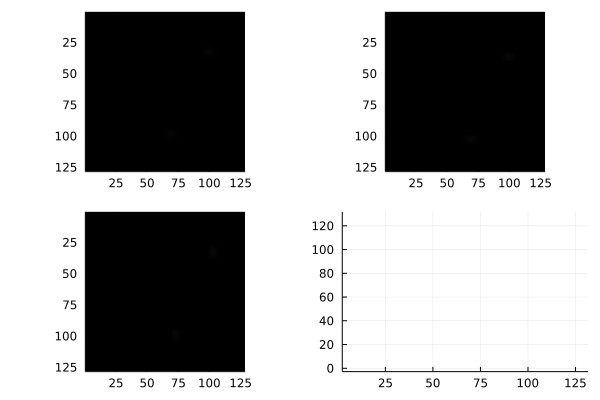

In [5]:
# Exercise 2.2
mhi = zeros(128, 128)
mhi[x_coords[1], y_coords[1]] += 1
anim = @animate for i in 2:length(allTs)
    # Update the mhi such that mhi(t) = max(0, mhi(told) − (t − told) · f),
    # where t is the current timestamp and told is the time stamp of the event
    # processed in the previous iteration and f = 0.00001
    @. mhi = max(0, mhi - (allTs[i] - allTs[i-1]) * 0.00001)

    # Increase mhi by one at the location of the currently processed event
    mhi[x_coords[i], y_coords[i]] += 1

    mhi_filtered = imfilter(mhi, Kernel.gaussian(3))
    p_mhi_1 = plot(Gray.(mhi_filtered), label="false")
    p_mhi_2 = plot(Gray.(imfilter(mhi_filtered, k_1)), label="false")
    p_mhi_3 = plot(Gray.(imfilter(mhi_filtered, k_3)), label="false")

    Gx, Gy = imgradients(Gray.(mhi_filtered), KernelFactors.sobel)
    # direction_estimated = atan.(Gy./Gx)
    # g_length = sqrt.(Gx.^2 .+ Gy.^2)
    
    p_mhi_4 = quiver(x_coords[1:8:length(x_coords)], y_coords[1:8:length(y_coords)], quiver=(atan.(Gy./Gx), atan.(Gx./Gy)))
    plot(p_mhi_1, p_mhi_2, p_mhi_3, p_mhi_4, layout=(2, 2))
end every 50

gif(anim, fps=30)

┌ Info: Saved animation to 
│   fn = /Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/tmp.gif
└ @ Plots /Users/lukas/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/tmp.gif")
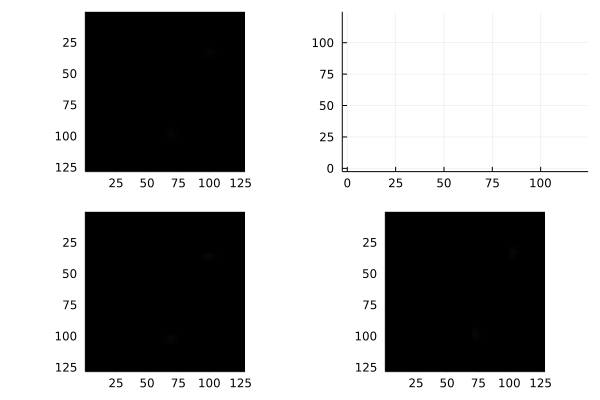

In [6]:
n_events = length(x_coords)

mhi = zeros(128, 128)
mhi[x_coords[1], y_coords[1]] += 1
anim = @animate for i in 2:n_events
    # Update the mhi such that mhi(t) = max(0, mhi(told) − (t − told) · f),
    # where t is the current timestamp and told is the time stamp of the event
    # processed in the previous iteration and f = 0.00001
    @. mhi = max(0, mhi - (allTs[i] - allTs[i-1]) * 0.00001)

    # Increase mhi by one at the location of the currently processed event
    mhi[x_coords[i], y_coords[i]] += 1

    mhi_filtered = imfilter(mhi, Kernel.gaussian(3))
    p_mhi_1 = plot(Gray.(mhi_filtered), label="false")
    p_mhi_h = plot(Gray.(imfilter(mhi_filtered, k_1)), label="false")
    p_mhi_v = plot(Gray.(imfilter(mhi_filtered, k_3)), label="false")

    Gy, Gx = imgradients(Gray.(mhi_filtered), KernelFactors.sobel)
    #=
    xs = 1:10:128
    ys = 1:10:128

    xxs = [x for x in xs for y in ys]
    yys = [y for x in xs for y in ys]
    
    p_mhi_grad = quiver(xxs, yys, quiver=(Gx[1:10:n_events], Gy[1:10:n_events]))
    =#
    x, y = meshgrid(0:10:128, 0:10:128)
    plot(p_mhi_1, p_mhi_grad, p_mhi_h, p_mhi_v, layout=(2, 2))
end every 50

gif(anim, fps=30)